In [ ]:
################################################

#Coursework 2
#"Deliveries", versio 1.0
#YIT19488399, Tony.
#Delivery date: 09 March 2022
#Value: 25% of total

################################################

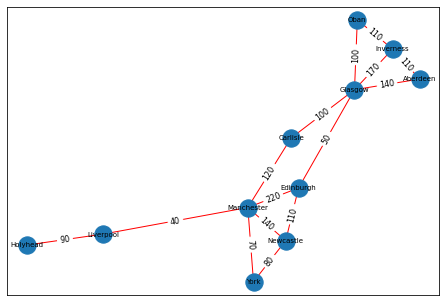

In [ ]:
# Map of UK by cities definition

#library for graphs
import networkx as nx
#library for plot and represent graphically on screen
import matplotlib.pyplot as plt

#Initialisation of an empty graph G
G = nx.Graph()
 
# Using add_edge. Total 15 weighted edges on UK graph.
G.add_edge("Manchester", "Liverpool", weight = 40)
G.add_edge("Manchester", "Carlisle", weight = 120)
G.add_edge("Manchester", "Edinburgh", weight = 220)
G.add_edge("Manchester", "Newcastle", weight = 140)
G.add_edge("Manchester", "York", weight = 70)
G.add_edge("Liverpool", "Holyhead", weight = 90)
G.add_edge("York", "Newcastle", weight = 80)
G.add_edge("Newcastle", "Edinburgh", weight = 110)
G.add_edge("Edinburgh", "Glasgow", weight = 50)
G.add_edge("Glasgow", "Oban", weight = 100)
G.add_edge("Glasgow", "Inverness", weight = 170)
G.add_edge("Glasgow", "Aberdeen", weight = 140)
G.add_edge("Glasgow", "Carlisle", weight = 100)
G.add_edge("Oban", "Inverness", weight = 110)
G.add_edge("Inverness", "Aberdeen", weight = 110)

#Not necessary, but can be useful in future. Nodes with its distance.
Graph_nodes = {
    'Manchester': [('Liverpool', 40), ('York', 70), ('Newcastle', 140), ('Edinburgh', 220), ('Carlisle', 120)],
    'Liverpool': [('Holyhead', 90)],
    'Holyhead': None,
    'Newcastle': [('Edinburgh', 110)],
    'Carlisle': [('Glasgow', 100)],
    'Edinburgh': [('Glasgow', 50)],
    'Glasgow': [('Oban', 100), ('Inverness', 170), ('Aberdeen', 140)],
    'Oban': [('Inverness', 50)],
    'Inverness': [('Aberdeen', 110)]
}
#Drawing on screen the Graph (map of the UK)
# Fruchterman Reingold. seed for fixed position of nodes
pos=nx.fruchterman_reingold_layout(G, seed=1)
#Specifications for the graph (color, font, etc.)
nx.draw(G, pos, edge_color="red", with_labels=True, font_size=7, font_weight = "normal")
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, font_size=8, edge_labels = edge_weight)
#borders in the picture visible
plt.axis("on")
ax = plt.gca()
ax.margins(0)
#command to plot the graph/map on screen
plt.show()


In [ ]:
#readable information for humans to verify previous graph
#https://networkx.org/documentation/stable/_modules/networkx/classes/graphviews.html#generic_graph_view

def generic_graph_view(G, create_using=None):
    if create_using is None:
        #<class '__main__.G'>. Metaclas. __class__ property of the object to find the type or class of the object.
        #__class__ is an attribute on the object that refers to the class from which the object was created.
        newG = G.__class__()
    else:
        newG = nx.empty_graph(0, create_using)
    if G.is_multigraph() != newG.is_multigraph():
        raise NetworkXError("Multigraph for G must agree with create_using")
    newG = nx.freeze(newG)

    # create view by assigning attributes from G
    #_ is a convention (PEP8) for privacy
    newG._graph = G
    newG.graph = G.graph

    newG._node = G._node
    if newG.is_directed():
        if G.is_directed():
            newG._succ = G._succ
            newG._pred = G._pred
            newG._adj = G._succ
        else:
            newG._succ = G._adj
            newG._pred = G._adj
            newG._adj = G._adj
    elif G.is_directed():
        #directed and multigraph
        if G.is_multigraph():
            newG._adj = UnionMultiAdjacency(G._succ, G._pred)
        else:
            newG._adj = UnionAdjacency(G._succ, G._pred)
    else:
        newG._adj = G._adj
    return newG

#Output of information in text mode to the screen
print(generic_graph_view(G, create_using=None))
print("\n")
print(list(G.edges(data = True)))

Graph with 11 nodes and 15 edges


[('Manchester', 'Liverpool', {'weight': 40}), ('Manchester', 'Carlisle', {'weight': 120}), ('Manchester', 'Edinburgh', {'weight': 220}), ('Manchester', 'Newcastle', {'weight': 140}), ('Manchester', 'York', {'weight': 70}), ('Liverpool', 'Holyhead', {'weight': 90}), ('Carlisle', 'Glasgow', {'weight': 100}), ('Edinburgh', 'Newcastle', {'weight': 110}), ('Edinburgh', 'Glasgow', {'weight': 50}), ('Newcastle', 'York', {'weight': 80}), ('Glasgow', 'Oban', {'weight': 100}), ('Glasgow', 'Inverness', {'weight': 170}), ('Glasgow', 'Aberdeen', {'weight': 140}), ('Oban', 'Inverness', {'weight': 110}), ('Inverness', 'Aberdeen', {'weight': 110})]


In [ ]:
#Searching in nodes if city is writen OK by user.

#All the cities in the UK map in a list. Nodes of the graph.
nodes=["Manchester", "Liverpool", "Holyhead", "York", "Newcastle",
      "Carlisle", "Edinburgh", "Glasgow", "Aberdeen", "Oban", "Inverness"]

def input_validation_cities():
    #https://blogs.glowscotland.org.uk/sh/ahscomputingpython/national-5/input-validation/
    #first input validation for a city (node)
    while True:
        #initial node input validation
        start_city = input('Enter initial city, please: ')
        if start_city not in nodes:
            print('Try again, starting with Capital')
        else:
            #if OK input from user, next while loop
            break
    #repetition for second input validation
    while True:
        #final node input validation
        end_city = input('Enter the final city, please: ')
        if end_city not in nodes:
            print('Try again, starting with Capital')
        else:
            #if OK input from user, code exit while loop and continue on print line.
            break
    print (start_city, end_city)     
    return (start_city, end_city)
    

In [ ]:
#For neighbour cities

def measure_distance(start, end):
    #Output 0 on screen if initial city same as final city. NO MOVEMENT!
    if start == end:
        print(f"Distance from {start} to {end} is 0 miles.\nYou did NOT moved!")
    #only for neighbours, making code faster and easier.    
    elif (start != end) and (start in G.neighbors(end)):
        distance_neighbours = G.get_edge_data(start, end) #only for nearest cities, edge is printed.
        print(f"Distance from {start} to {end} is {distance_neighbours['weight']} miles.")
    #This should be the normal option for all the program, because cities are not same and not neighbours.    
    elif (not(start in G.neighbors(end)) and not((end in G.neighbors(start)))):
        print(f"Choose a program to navigate from {start} city, to {end} city.")
    #Good practice. Never executed because NO human intervention     
    else:
        print("Error. Restart the program!")
        
        

In [ ]:
#Print on screen to choose an algorith. 1 to 7.

def choose_searching_algorithm():
    print("\nCities ara not direct connected. Navigation activated!")
    print("\nChoose one algorithm to navigate because cities are NOT neighbours")
    print("1: DFS\n2: BFS\n3: A*\n4: Dijkstra’s algorithm\n5: All possible paths\n7: Bellman Ford\n6: Exit")
    #Input validation for accept only 1,2,3,4,5,6 or 7.
    while True:
        num = input('Please choose a number between 1 and 7 > ')
        if num not in {'1', '2', '3', '4', '5', '6', '7'}:
            print('We expect you to enter a valid integer')
        else:
            num = int(num)
            #program stores the input number and give it when function "choose_searching_algorithm()" is called.
            return num
            #end of while loop and the function.
            break
            

In [ ]:
# 1. depth_first_search():

#Print all the possible paths by dfs algorithm
def dfs_path(graph,start,end):
    result = []
    dfs(graph,start,end,[],result)
    #First dfs option is the best, because there are many different ways to travel bt dfs.
    return result[0]


#Necessary function to "dfs_path(graph,start,end)" to function.
def dfs(graph,start,end,path,result):
    #Initialisation of route from the starting point
    path+=[start]
    if start == end:
        result.append(path)
    #adding nodes to the path
    else:
        for node in graph[start]:
            if node not in path:
                dfs(graph,node,end,path[:],result)



In [ ]:
# 2. breadth_first_search()

#Two functions that cover the map by bfs style.
#Output of both functions should be the same.

from queue import Queue

def bfs(adj_list, start_node, target_node):
    # Set of visited nodes to prevent loops
    visited = set()
    queue = Queue()

    # Add the start_node to the queue and visited list
    queue.put(start_node)
    visited.add(start_node)
    
    # start_node has not parents
    parent = dict()
    parent[start_node] = None

    # Perform step 3
    path_found = False
    while not queue.empty():
        current_node = queue.get()
        if current_node == target_node:
            path_found = True
            break

        for next_node in adj_list[current_node]:
            if next_node not in visited:
                queue.put(next_node)
                parent[next_node] = current_node
                visited.add(next_node)
                
    # Path reconstruction
    path = []
    if path_found:
        path.append(target_node)
        while parent[target_node] is not None:
            path.append(parent[target_node]) 
            target_node = parent[target_node]
        path.reverse()
    return path


def bfs_shortest_path(graph, start, goal):
    # keep track of explored nodes
    explored = []
    # keep track of all the paths to be checked
    queue = [[start]]

    # return path if start is goal
    if start == goal:
        return [start]

    #https://www.linkedin.com/pulse/using-python-find-shortest-degree-separation-between-webpages-heiken/
    # keeps looping until all possible paths have been checked
    while queue:
        # pop the first path from the queue
        path = queue.pop(0)
        # get the last node from the path
        node = path[-1]
        if node not in explored:
            next_nodes = graph[node]
            # go through all neighbor nodes, construct a new path and push it into the queue
            for next_node in next_nodes:
                new_path = list(path)
                new_path.append(next_node)
                queue.append(new_path)
                # return path if neighbor is goal
                if next_node == goal:
                    return new_path

            # mark node as explored
            explored.append(node)

    # in case there's no path between the 2 nodes
    return []


In [ ]:
# 3
#def a_star_search():

#https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.astar.astar_path.html
#https://networkx.org/documentation/stable/_modules/networkx/algorithms/shortest_paths/astar.html#astar_path.html

#Shortest paths and path lengths using the A* ("A star") algorithm.
from heapq import heappush, heappop
from itertools import count
from networkx.algorithms.shortest_paths.weighted import _weight_function


#Straight line value from Manchester from website provided in the coursework.
heuristics = {}
heuristics['Manchester'] = 0
heuristics['Holyhead'] = 100
heuristics['Liverpool'] = 31
heuristics['York'] = 57
heuristics['Carlisle'] = 10
heuristics['Newcastle'] = 106
heuristics['Glasgow'] = 163
heuristics['Edinburgh'] = 175
heuristics['Oban'] = 240
heuristics['Aberdeen'] = 253
heuristics['Inverness'] = 287


def distance(start,end):
    return heuristics[end]


__all__ = ["astar_path", "astar_path_length"]

#function that takes graph, start an end nodes.
def astar_path(G, source, target, heuristic=None, weight="weight"):
    """Returns a list of nodes in a shortest path between source and target using the A* ("A-star") algorithm.

    There may be more than one shortest path.  This returns only one.

    Parameters
    ----------
    G : NetworkX graph

    source : node
       Starting node for path

    target : node
       Ending node for path

    heuristic : function
       A function to evaluate the estimate of the distance
       from the a node to the target.  The function takes
       two nodes arguments and must return a number.

    weight : string or function
       If this is a string, then edge weights will be accessed via the
       edge attribute with this key (that is, the weight of the edge
       joining `u` to `v` will be ``G.edges[u, v][weight]``). If no
       such edge attribute exists, the weight of the edge is assumed to
       be one.
       If this is a function, the weight of an edge is the value
       returned by the function. The function must accept exactly three
       positional arguments: the two endpoints of an edge and the
       dictionary of edge attributes for that edge. The function must
       return a number.

    Raises
    ------
    NetworkXNoPath
        If no path exists between source and target.
    """
    
    if source not in G or target not in G:
        msg = f"Either source {source} or target {target} is not in G"
        raise nx.NodeNotFound(msg)

    if heuristic is None:
        # The default heuristic is h=0 - same as Dijkstra's algorithm
        def heuristic(u, v):
            #add heuristic value of last node (destination)
            return 0

    push = heappush
    pop = heappop
    weight = _weight_function(G, weight)

    # The queue stores priority, node, cost to reach, and parent.
    # Uses Python heapq to keep in priority order.
    # Add a counter to the queue to prevent the underlying heap from
    # attempting to compare the nodes themselves. The hash breaks ties in the
    # priority and is guaranteed unique for all nodes in the graph.
    c = count()
    queue = [(0, next(c), source, 0, None)]

    # Maps enqueued nodes to distance of discovered paths and the
    # computed heuristics to target. We avoid computing the heuristics
    # more than once and inserting the node into the queue too many times.
    enqueued = {}
    # Maps explored nodes to parent closest to the source.
    explored = {}

    while queue:
        # Pop the smallest item from queue.
        #a single standalone underscore is used as a name to indicate that a variable is temporary or insignificant
        _, __, curnode, dist, parent = pop(queue)

        if curnode == target:
            path = [curnode]
            node = parent
            while node is not None:
                path.append(node)
                node = explored[node]
            path.reverse()
            return path

        if curnode in explored:
            # Do not override the parent of starting node
            if explored[curnode] is None:
                continue

            # Skip bad paths that were enqueued before finding a better one
            qcost, h = enqueued[curnode]
            if qcost < dist:
                continue

        explored[curnode] = parent

        for neighbor, w in G[curnode].items():
            ncost = dist + weight(curnode, neighbor, w)
            if neighbor in enqueued:
                qcost, h = enqueued[neighbor]
                # if qcost <= ncost, a less costly path from the
                # neighbor to the source was already determined.
                # Therefore, we won't attempt to push this neighbor
                # to the queue
                if qcost <= ncost:
                    continue
            else:
                h = heuristic(neighbor, target)
            enqueued[neighbor] = ncost, h
            push(queue, (ncost + h, next(c), neighbor, ncost, curnode))
                
    raise nx.NetworkXNoPath(f"Node {target} not reachable from {source}")


def astar_path_length(G, source, target, heuristic=None, weight="weight"):
    """Returns the length of the shortest path between source and target using the A* ("A-star") algorithm.

    Parameters
    ----------
    G : NetworkX graph

    source : node
       Starting node for path

    target : node
       Ending node for path

    heuristic : function
       A function to evaluate the estimate of the distance
       from the a node to the target.  The function takes
       two nodes arguments and must return a number.

    weight : string or function
       If this is a string, then edge weights will be accessed via the
       edge attribute with this key (that is, the weight of the edge
       joining `u` to `v` will be ``G.edges[u, v][weight]``). If no
       such edge attribute exists, the weight of the edge is assumed to
       be one.
       If this is a function, the weight of an edge is the value
       returned by the function. The function must accept exactly three
       positional arguments: the two endpoints of an edge and the
       dictionary of edge attributes for that edge. The function must
       return a number.
    Raises
    ------
    NetworkXNoPath
        If no path exists between source and target.
    """
    
    if source not in G or target not in G:
        msg = f"Either source {source} or target {target} is not in G"
        raise nx.NodeNotFound(msg)

    weight = _weight_function(G, weight)
    path = astar_path(G, source, target, heuristic, weight)
    return sum(weight(u, v, G[u][v]) for u, v in zip(path[:-1], path[1:]))


In [ ]:
# 4 Dijkstra's algorithm
#https://networkx.org/documentation/networkx-1.10/_modules/networkx/algorithms/shortest_paths/weighted.html#dijkstra_path


from collections import deque
from heapq import heappush, heappop
from itertools import count
from networkx.utils import generate_unique_node


def dijkstra_path(G, source, target, weight='weight'):
    """Returns the shortest path from source to target in a weighted graph G.

    Parameters
    ----------
    G : NetworkX graph

    source : node
       Starting node

    target : node
       Ending node

    weight: string, optional (default='weight')
       Edge data key corresponding to the edge weight

    Returns
    -------
    path : list
       List of nodes in a shortest path.

    Raises
    ------
    NetworkXNoPath
       If no path exists between source and target.

    Notes
    ------
    Edge weight attributes must be numerical.
    Distances are calculated as sums of weighted edges traversed.
    """
    
    (length, path) = single_source_dijkstra(G, source, target=target,weight=weight)
    try:
        return path[target]
    except KeyError:
        raise nx.NetworkXNoPath(
            "node %s not reachable from %s" % (source, target))

        
def single_source_dijkstra(G, source, target=None, cutoff=None, weight='weight'):
    """Compute shortest paths and lengths in a weighted graph G.

    Uses Dijkstra's algorithm for shortest paths.

    Parameters
    ----------
    G : NetworkX graph

    source : node label
       Starting node for path

    target : node label, optional
       Ending node for path

    cutoff : integer or float, optional
       Depth to stop the search. Only paths of length <= cutoff are returned.

    Returns
    -------
    distance,path : dictionaries
       Returns a tuple of two dictionaries keyed by node.
       The first dictionary stores distance from the source.
       The second stores the path from the source to that node.

    Notes
    ---------
    Edge weight attributes must be numerical.
    Distances are calculated as sums of weighted edges traversed.

    Based on the Python cookbook recipe (119466) at
    http://aspn.activestate.com/ASPN/Cookbook/Python/Recipe/119466

    This algorithm is not guaranteed to work if edge weights
    are negative or are floating point numbers
    (overflows and roundoff errors can cause problems).
    """
    
    if source == target:
        return ({source: 0}, {source: [source]})

    if G.is_multigraph():
        get_weight = lambda u, v, data: min(
            eattr.get(weight, 1) for eattr in data.values())
    else:
        get_weight = lambda u, v, data: data.get(weight, 1)

    paths = {source: [source]}  # dictionary of paths
    return _dijkstra(G, source, get_weight, paths=paths, cutoff=cutoff,
                     target=target)


def multi_source_dijkstra(G, sources, target=None, cutoff=None, weight="weight"):
    """Find shortest weighted paths and lengths from a given set of
    source nodes.

    Uses Dijkstra's algorithm to compute the shortest paths and lengths
    between one of the source nodes and the given `target`, or all other
    reachable nodes if not specified, for a weighted graph.

    Parameters
    ----------
    G : NetworkX graph

    sources : non-empty set of nodes
        Starting nodes for paths. If this is just a set containing a
        single node, then all paths computed by this function will start
        from that node. If there are two or more nodes in the set, the
        computed paths may begin from any one of the start nodes.

    target : node label, optional
        Ending node for path

    cutoff : integer or float, optional
        Length (sum of edge weights) at which the search is stopped.
        If cutoff is provided, only return paths with summed weight <= cutoff.

    weight : string or function
        If this is a string, then edge weights will be accessed via the
        edge attribute with this key (that is, the weight of the edge
        joining `u` to `v` will be ``G.edges[u, v][weight]``). If no
        such edge attribute exists, the weight of the edge is assumed to
        be one.

        If this is a function, the weight of an edge is the value
        returned by the function. The function must accept exactly three
        positional arguments: the two endpoints of an edge and the
        dictionary of edge attributes for that edge. The function must
        return a number.

    Returns
    -------
    distance, path : pair of dictionaries, or numeric and list
        If target is None, returns a tuple of two dictionaries keyed by node.
        The first dictionary stores distance from one of the source nodes.
        The second stores the path from one of the sources to that node.
        If target is not None, returns a tuple of (distance, path) where
        distance is the distance from source to target and path is a list
        representing the path from source to target.


    Notes
    -----
    Edge weight attributes must be numerical.
    Distances are calculated as sums of weighted edges traversed.

    The weight function can be used to hide edges by returning None.
    So ``weight = lambda u, v, d: 1 if d['color']=="red" else None``
    will find the shortest red path.

    Based on the Python cookbook recipe (119466) at
    https://code.activestate.com/recipes/119466/

    This algorithm is not guaranteed to work if edge weights
    are negative or are floating point numbers
    (overflows and roundoff errors can cause problems).

    Raises
    ------
    ValueError
        If `sources` is empty.
    NodeNotFound
        If any of `sources` is not in `G`.
    """
    
    if not sources:
        raise ValueError("sources must not be empty")
    for s in sources:
        if s not in G:
            raise nx.NodeNotFound(f"Node {s} not found in graph")
    if target in sources:
        return (0, [target])
    weight = _weight_function(G, weight)
    paths = {source: [source] for source in sources}  # dictionary of paths
    dist = _dijkstra_multisource(
        G, sources, weight, paths=paths, cutoff=cutoff, target=target
    )
    if target is None:
        return (dist, paths)
    try:
        return (dist[target], paths[target])
    except KeyError as err:
        raise nx.NetworkXNoPath(f"No path to {target}.") from err

        
#_ means non_public. Only for internal use. This function is necessary to other dijkstra's functions.
def _dijkstra(G, source, get_weight, pred=None, paths=None, cutoff=None, target=None):
    """Implementation of Dijkstra's algorithm

    Parameters
    ----------
    G : NetworkX graph

    source : node label
       Starting node for path

    get_weight: function
        Function for getting edge weight

    pred: list, optional(default=None)
        List of predecessors of a node

    paths: dict, optional (default=None)
        Path from the source to a target node.

    target : node label, optional
       Ending node for path

    cutoff : integer or float, optional
       Depth to stop the search. Only paths of length <= cutoff are returned.

    Returns
    -------
    distance,path : dictionaries
       Returns a tuple of two dictionaries keyed by node.
       The first dictionary stores distance from the source.
       The second stores the path from the source to that node.

    pred,distance : dictionaries
       Returns two dictionaries representing a list of predecessors
       of a node and the distance to each node.

    distance : dictionary
       Dictionary of shortest lengths keyed by target.
    """
    G_succ = G.succ if G.is_directed() else G.adj

    push = heappush
    pop = heappop
    dist = {}  # dictionary of final distances
    seen = {source: 0}
    c = count()
    fringe = []  # use heapq with (distance,label) tuples
    push(fringe, (0, next(c), source))
    while fringe:
        (d, _, v) = pop(fringe)
        if v in dist:
            continue  # already searched this node.
        dist[v] = d
        if v == target:
            break

        for u, e in G_succ[v].items():
            cost = get_weight(v, u, e)
            if cost is None:
                continue
            vu_dist = dist[v] + get_weight(v, u, e)
            if cutoff is not None:
                if vu_dist > cutoff:
                    continue
            if u in dist:
                if vu_dist < dist[u]:
                    raise ValueError('Contradictory paths found:',
                                     'negative weights?')
            elif u not in seen or vu_dist < seen[u]:
                seen[u] = vu_dist
                push(fringe, (vu_dist, next(c), u))
                if paths is not None:
                    paths[u] = paths[v] + [u]
                if pred is not None:
                    pred[u] = [v]
            elif vu_dist == seen[u]:
                if pred is not None:
                    pred[u].append(v)

    if paths is not None:
        return (dist, paths)
    if pred is not None:
        return (pred, dist)
    return dist


In [ ]:
#4 bis. The map is weighted undirectional or weighted bidirectional.
#https://networkx.org/documentation/stable/_modules/networkx/algorithms/shortest_paths/weighted.html#dijkstra_path


def bidirectional_dijkstra(G, source, target, weight="weight"):
    r"""Dijkstra's algorithm for shortest paths using bidirectional search.

    Parameters
    ----------
    G : NetworkX graph

    source : node
        Starting node.

    target : node
        Ending node.

    weight : string or function
        If this is a string, then edge weights will be accessed via the
        edge attribute with this key (that is, the weight of the edge
        joining `u` to `v` will be ``G.edges[u, v][weight]``). If no
        such edge attribute exists, the weight of the edge is assumed to
        be one.

        If this is a function, the weight of an edge is the value
        returned by the function. The function must accept exactly three
        positional arguments: the two endpoints of an edge and the
        dictionary of edge attributes for that edge. The function must
        return a number.

    Returns
    -------
    length, path : number and list
        length is the distance from source to target.
        path is a list of nodes on a path from source to target.

    Raises
    ------
    NodeNotFound
        If either `source` or `target` is not in `G`.

    NetworkXNoPath
        If no path exists between source and target.

    Notes
    -----
    Edge weight attributes must be numerical.
    Distances are calculated as sums of weighted edges traversed.

    The weight function can be used to hide edges by returning None.
    So ``weight = lambda u, v, d: 1 if d['color']=="red" else None``
    will find the shortest red path.

    In practice  bidirectional Dijkstra is much more than twice as fast as
    ordinary Dijkstra.

    Ordinary Dijkstra expands nodes in a sphere-like manner from the
    source. The radius of this sphere will eventually be the length
    of the shortest path. Bidirectional Dijkstra will expand nodes
    from both the source and the target, making two spheres of half
    this radius. Volume of the first sphere is `\pi*r*r` while the
    others are `2*\pi*r/2*r/2`, making up half the volume.

    This algorithm is not guaranteed to work if edge weights
    are negative or are floating point numbers
    (overflows and roundoff errors can cause problems).
    """
    
    if source not in G or target not in G:
        msg = f"Either source {source} or target {target} is not in G"
        raise nx.NodeNotFound(msg)

    if source == target:
        return (0, [source])

    weight = _weight_function(G, weight)
    push = heappush
    pop = heappop
    # Init:  [Forward, Backward]
    dists = [{}, {}]  # dictionary of final distances
    paths = [{source: [source]}, {target: [target]}]  # dictionary of paths
    fringe = [[], []]  # heap of (distance, node) for choosing node to expand
    seen = [{source: 0}, {target: 0}]  # dict of distances to seen nodes
    c = count()
    # initialize fringe heap
    push(fringe[0], (0, next(c), source))
    push(fringe[1], (0, next(c), target))
    # neighs for extracting correct neighbor information
    if G.is_directed():
        neighs = [G._succ, G._pred]
    else:
        neighs = [G._adj, G._adj]
    # variables to hold shortest discovered path
    # finaldist = 1e30000
    finalpath = []
    dir = 1
    while fringe[0] and fringe[1]:
        # choose direction
        # dir == 0 is forward direction and dir == 1 is back
        dir = 1 - dir
        # extract closest to expand
        (dist, _, v) = pop(fringe[dir])
        if v in dists[dir]:
            # Shortest path to v has already been found
            continue
        # update distance
        dists[dir][v] = dist  # equal to seen[dir][v]
        if v in dists[1 - dir]:
            # if we have scanned v in both directions we are done
            # we have now discovered the shortest path
            return (finaldist, finalpath)

        for w, d in neighs[dir][v].items():
            # weight(v, w, d) for forward and weight(w, v, d) for back direction
            cost = weight(v, w, d) if dir == 0 else weight(w, v, d)
            if cost is None:
                continue
            vwLength = dists[dir][v] + cost
            if w in dists[dir]:
                if vwLength < dists[dir][w]:
                    raise ValueError("Contradictory paths found: negative weights?")
            elif w not in seen[dir] or vwLength < seen[dir][w]:
                # relaxing
                seen[dir][w] = vwLength
                push(fringe[dir], (vwLength, next(c), w))
                paths[dir][w] = paths[dir][v] + [w]
                if w in seen[0] and w in seen[1]:
                    # see if this path is better than the already
                    # discovered shortest path
                    totaldist = seen[0][w] + seen[1][w]
                    if finalpath == [] or finaldist > totaldist:
                        finaldist = totaldist
                        revpath = paths[1][w][:]
                        revpath.reverse()
                        finalpath = paths[0][w] + revpath[1:]
    raise nx.NetworkXNoPath(f"No path between {source} and {target}.")
    


In [ ]:
#EXTRA: 7. Bellman Ford algorithm

#Similar to dijkstra, but allowing negative paths. In this weighted bidirectional graph do NOT exist negative path values.
#https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.weighted.bellman_ford_path.html#networkx.algorithms.shortest_paths.weighted.bellman_ford_path
#https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.weighted.bellman_ford_path_length.html#networkx.algorithms.shortest_paths.weighted.bellman_ford_path_length
#https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html


def ford():
    return (nx.bellman_ford_path(G, start, end, weight='weight'),
            nx.bellman_ford_path_length(G, start, end, weight='weight'), "miles")

#It is possible to find the functions (source code) of the previous build in methods in the previous links.


In [ ]:
# 5
#https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.simple_paths.all_simple_paths.html


#different possible paths from start to end in 2 different types of views.
def all_paths():
    
    #first view
    for path in nx.all_simple_paths(G, source=start, target=end):
        print(path)
    print("\n\n\n")
    #build in function from networkx library
    paths = nx.all_simple_paths(G, source=start, target=end)
    
    #second view
    for path in map(nx.utils.pairwise, paths):
        print(list(path))
    exit_function_all_paths = print("\nTwo different styles of same paths.")
    return exit_function_all_paths


In [ ]:
#Main function:

# input from user of starting and ending cities
(start, end) = input_validation_cities()
#analyse wich cities entered by used and give output about distance or choosing and algorithm to navigate in between
measure_distance(start, end)

#like swithc statement in c/c++
if (not(start in G.neighbors(end)) and (start != end) and not((end in G.neighbors(start)))):
    choice = choose_searching_algorithm()
    if choice == 6:
        print("Exit")
        
    elif choice == 1:
        print("DFS")
        print(dfs_path(G,start,end))
        #build in function from networkx
        print(list(nx.dfs_edges(G, source=start, depth_limit=None)))
        
    elif choice == 2:
        print("BFS")
        print(bfs(G, start, end))
        print(bfs_shortest_path(G, start, end))
        #build in function from networkx
        print(list(nx.bfs_edges(G, source=start, depth_limit=None)))
        
    elif choice == 3:
        print("A*")
        print(astar_path(G, start, end, heuristic=distance, weight='weight'))
        print(astar_path_length(G, start, end, heuristic=distance, weight="weight")+distance(start,end), "miles")
        #verification for a built in function
        print(nx.astar_path(G, start, end))
        print(nx.astar_path_length(G, start, end)+distance(start,end), "miles")
        
    elif choice == 4:
        print("Dijkstra")
        print(dijkstra_path(G, start, end, weight='weight'))
        print(bidirectional_dijkstra(G, start, end, weight="weight"))
        #verification for a built in function
        print(nx.dijkstra_path(G, start, end))
        print(nx.dijkstra_path_length(G, start, end), "miles")
        print(nx.bidirectional_dijkstra(G, start, end))
        
    elif choice == 5:
        print("All possible paths")
        print(all_paths())
    
    elif choice == 7:
        print("Bellman Ford")
        print(ford())
        
    else:
        print("Error. Restart the program!") #Never hapen because input validation from "choose_searching_algorithm()"

        
#Some repetitions, specially in 4 (Dijkstra) to assure code is working OK.


Enter initial city, please: Manchester
Enter the final city, please: Oban
Manchester Oban
Choose a program to navigate from Manchester city, to Oban city.

Cities ara not direct connected. Navigation activated!

Choose one algorithm to navigate because cities are NOT neighbours
1: DFS
2: BFS
3: A*
4: Dijkstra’s algorithm
5: All possible paths
7: Bellman Ford
6: Exit
Please choose a number between 1 and 7 > 5
All possible paths
['Manchester', 'Carlisle', 'Glasgow', 'Oban']
['Manchester', 'Carlisle', 'Glasgow', 'Inverness', 'Oban']
['Manchester', 'Carlisle', 'Glasgow', 'Aberdeen', 'Inverness', 'Oban']
['Manchester', 'Edinburgh', 'Glasgow', 'Oban']
['Manchester', 'Edinburgh', 'Glasgow', 'Inverness', 'Oban']
['Manchester', 'Edinburgh', 'Glasgow', 'Aberdeen', 'Inverness', 'Oban']
['Manchester', 'Newcastle', 'Edinburgh', 'Glasgow', 'Oban']
['Manchester', 'Newcastle', 'Edinburgh', 'Glasgow', 'Inverness', 'Oban']
['Manchester', 'Newcastle', 'Edinburgh', 'Glasgow', 'Aberdeen', 'Inverness', 'Oba

In [ ]:
#END OF THE PROGRAM. HAVE A NICE DAY!